 - add 2 synthetic columns with column name 'Name of Patient', 'Patient aadhaar number'
 - write meaningful data to those columns ( based on real life examples )
    - check for null values in the dataframe
    - check and display the the count of null values in the dataframe under each column name
    - try to modilfy the data for below cells with null values
        - row 1, column 5
        - row 2, column 3
        - row 5, column 11
        - row 96, column 5
        - row 1, column 1
    - now display the dataframe and observe the null values associated to each column
    - display the count of null values in the datframe now ( i.e. after adding columns, modifying under synthetic new columns too )
    - drop one of the column you have created i.e. 'Name of Patient'
    - fill the null values in column 1 i.e. 'Age' with meaningful data based on the other values available in that column

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets as ds
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_dict = ds.load_diabetes(as_frame=True)

df = data_dict['data']

In [4]:
random_integers = [random.randint(10**11, (10**12)-1) for _ in range(442)]
# random_integers = 

names = [
    "Liam", "Emma", "Noah", "Olivia", "Ethan", "Ava", "Aiden", "Sophia", "Jackson", "Isabella",
    "Lucas", "Mia", "Oliver", "Charlotte", "Caden", "Amelia", "Mateo", "Harper", "Muhammad", "Evelyn",
    "Grayson", "Abigail", "Mason", "Emily", "Logan", "Elizabeth", "Sebastian", "Sofia", "Alexander", "Avery",
    "Daniel", "Ella", "Henry", "Scarlett", "Matthew", "Grace", "Samuel", "Chloe", "David", "Victoria",
    "Carter", "Riley", "Wyatt", "Aria", "John", "Lily", "Owen", "Zoey", "Dylan", "Penelope",
    "Luke", "Layla", "Jack", "Nora", "James", "Lila", "Gabriel", "Ellie", "Isaac", "Hazel",
    "Benjamin", "Luna", "Ryan", "Maya", "William", "Aubrey", "Leo", "Aurora", "Caleb", "Stella",
    "Lucas", "Hannah", "Julian", "Addison", "Grayson", "Savannah", "Leo", "Brooklyn", "Luke", "Robert",
    "Lucy", "Benjamin", "Natalie", "Joshua", "Zoe", "Nathan", "Leah", "Adam", "Audrey",
    "Samuel", "Claire", "Joseph", "Eleanor", "Hunter", "Skylar", "Isaac", "Naomi", "Anthony", "Samantha",
    "Isaiah", "Zoe", "Eli", "Ellie", "Aaron", "Stella", "Thomas", "Violet", "Caleb", "Aurora",
    "Andrew", "Bella", "Cooper", "Brooklyn", "Charlie", "Elena", "David", "Emilia", "Luke", "Everly",
    "Samuel", "Peyton", "Christian", "Scarlett", "Isaac", "Aria", "Henry", "Penelope", "Owen", "Layla",
    "Wyatt", "Aubrey", "Jack", "Claire", "Leo", "Skylar", "Julian", "Riley", "Michael", "Isabella",
    "Daniel", "Zoe", "Matthew", "Lucy", "Joseph", "Ava", "Samuel", "Harper", "William", "Olivia",
    "Anthony", "Mia", "Benjamin", "Amelia", "Elijah", "Evelyn", "Andrew", "Sofia", "James", "Grace",
    "Joshua", "Lily", "Liam", "Victoria", "Ethan", "Scarlett", "Michael", "Emily", "Alexander", "Aria",
    "Daniel", "Bella", "William", "Aurora", "Carter", "Penelope", "Benjamin", "Claire", "Henry", "Emily",
    "Samuel", "Scarlett", "Ethan", "Ava", "William", "Amelia", "Daniel", "Elizabeth", "James", "Chloe",
    "Benjamin", "Lily", "Christopher", "Grace", "Jack", "Layla", "Alexander", "Ella", "Joseph", "Victoria",
    "Liam", "Harper", "Carter", "Sofia", "William", "Mia", "Daniel", "Scarlett", "James", "Aria",
    "Henry", "Penelope", "Alexander", "Bella", "Christian", "Aurora", "David", "Emily", "Michael", "Ava",
    "Joseph", "Elizabeth", "Liam", "Chloe", "Christopher", "Lily", "Samuel", "Grace", "Benjamin", "Layla",
    "James", "Ella", "Ethan", "Victoria", "William", "Harper", "Carter", "Mia", "Daniel", "Scarlett",
    "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella", "Christian", "Aurora", "David", "Emily",
    "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe", "Samuel", "Lily", "Jack", "Grace",
    "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Daniel", "Harper", "James", "Mia",
    "Ethan", "Scarlett", "Benjamin", "Aria", "Henry", "Penelope", "Samuel", "Bella", "David", "Aurora",
    "Christian", "Emily", "Michael", "Ava", "Joseph", "Elizabeth", "Liam", "Chloe", "Christopher", "Lily",
    "Samuel", "Grace", "Benjamin", "Layla", "James", "Ella", "Ethan", "Victoria", "William", "Harper",
    "Carter", "Mia", "Daniel", "Scarlett", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella",
    "Christian", "Aurora", "David", "Emily", "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe",
    "Samuel", "Lily", "Jack", "Grace", "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Emily",
    "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe", "Samuel", "Lily", "Jack", "Grace",
    "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Daniel", "Harper", "James", "Mia",
    "Ethan", "Scarlett", "Benjamin", "Aria", "Henry", "Penelope", "Samuel", "Bella", "David", "Aurora",
    "Christian", "Emily", "Michael", "Ava", "Joseph", "Elizabeth", "Liam", "Chloe", "Christopher", "Lily",
    "Samuel", "Grace", "Benjamin", "Layla", "James", "Ella", "Ethan", "Victoria", "William", "Harper",
    "Carter", "Mia", "Daniel", "Scarlett", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella",
    "Christian", "Aurora", "David", "Emily", "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe",
    "Samuel", "Lily", "Jack", "Grace", "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella",
    "Christian", "Aurora", "David", "Emily", "Michael", "Ava", "Liam", "Elizabeth", "Christopher", "Chloe",
    "Samuel", "Lily", "Jack", "Grace", "Alexander", "Layla", "Joseph", "Ella", "William", "Victoria", "Alexander", "Aria", "Joseph", "Penelope", "Benjamin", "Bella"
]

In [5]:
df['Name of Patient'] = names
df['Patient Aadhaar Number'] = random_integers

In [6]:
df.loc[1,'s2'] = None
df.loc[2,'bp'] = None
df.loc[5,'Patient Aadhaar Number'] = None
df.loc[96, 's2'] = None
df.loc[1,'sex'] = None

In [7]:
df['sex'].isnull().sum()

1

## Plotting many things

<Axes: xlabel='age', ylabel='bp'>

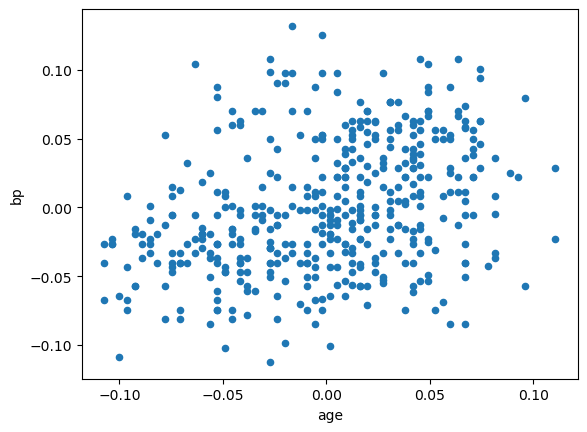

In [8]:
df.plot(x='age', y = 'bp', kind='scatter')

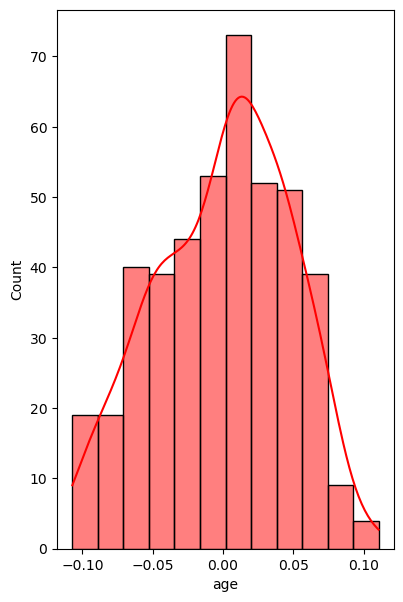

In [9]:
plt.figure(figsize=(20,7))

# histogram
plt.subplot(1,4,1)
sns.histplot(df['age'], kde = True, color = 'r')

plt.show()

In [10]:
def figure_plot(df, variable, target):
    plt.figure(figsize=(20,7))

    # histogram
    plt.subplot(1,4,1)
    sns.histplot(df[variable], kde=True, color='r')
    plt.title('Histogram')

    # scatterplot
    plt.subplot(1,4,2)
    plt.scatter(df[variable], df[target], color='pink')
    plt.title('Scatterplot')

    # barplot
    plt.subplot(1,4,3)
    sns.barplot(x = target, y = variable, data = df)
    plt.title('Barplot')

    plt.show()

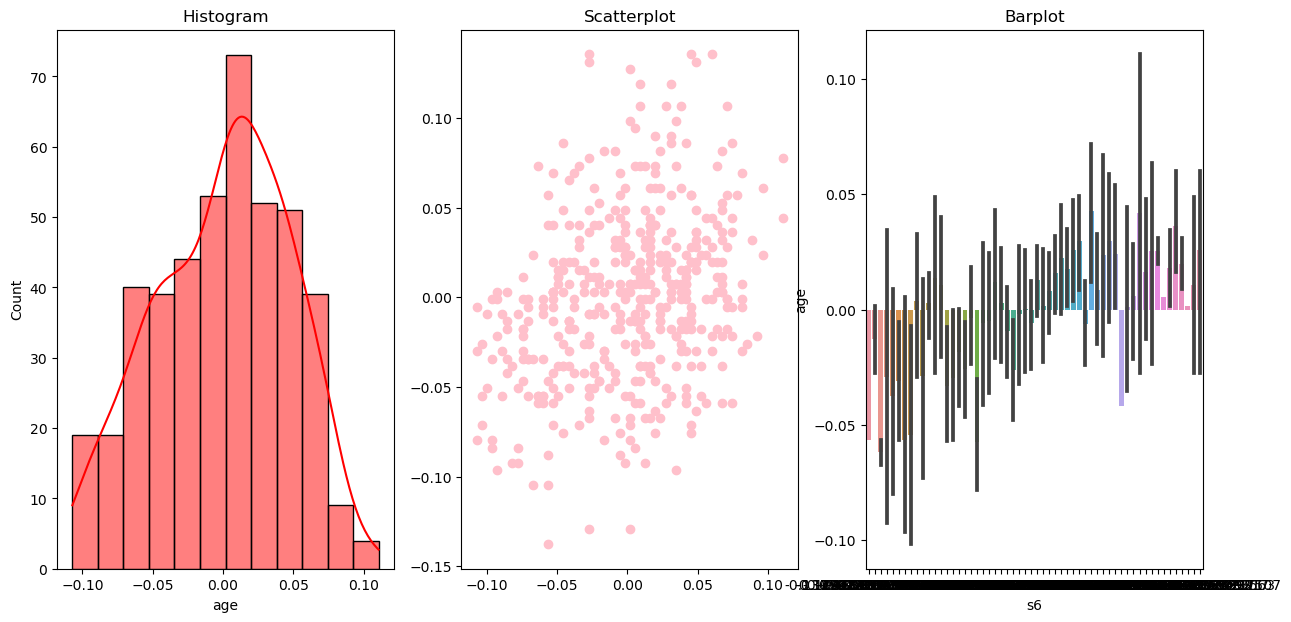

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


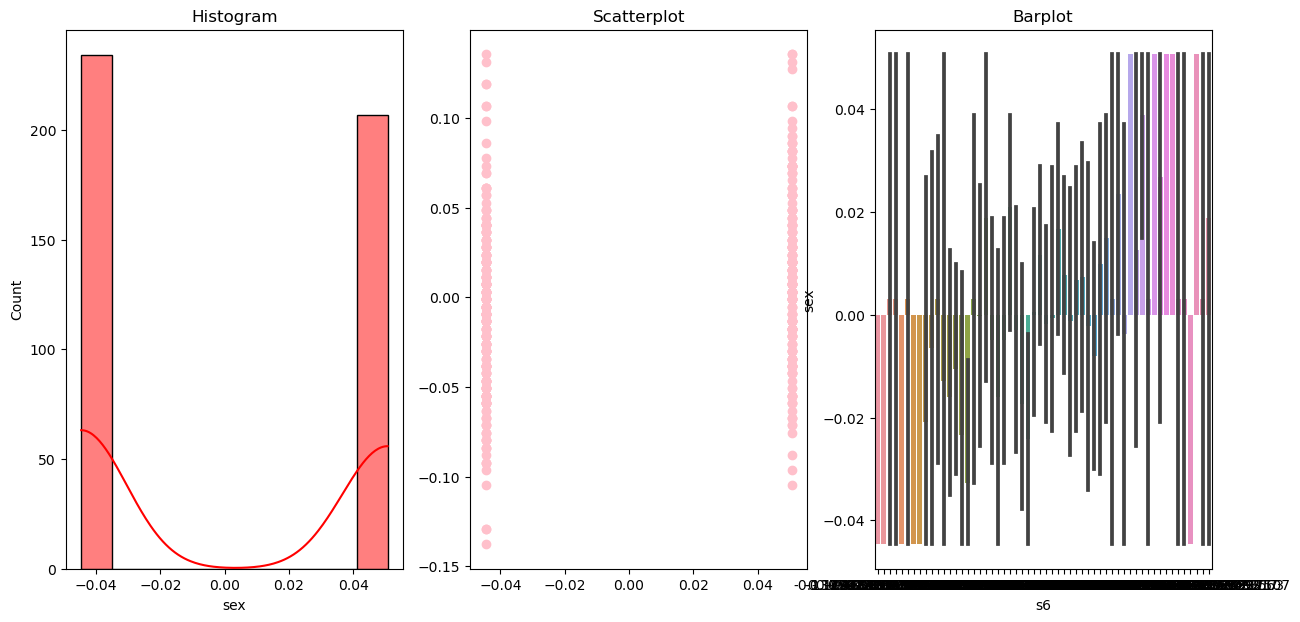

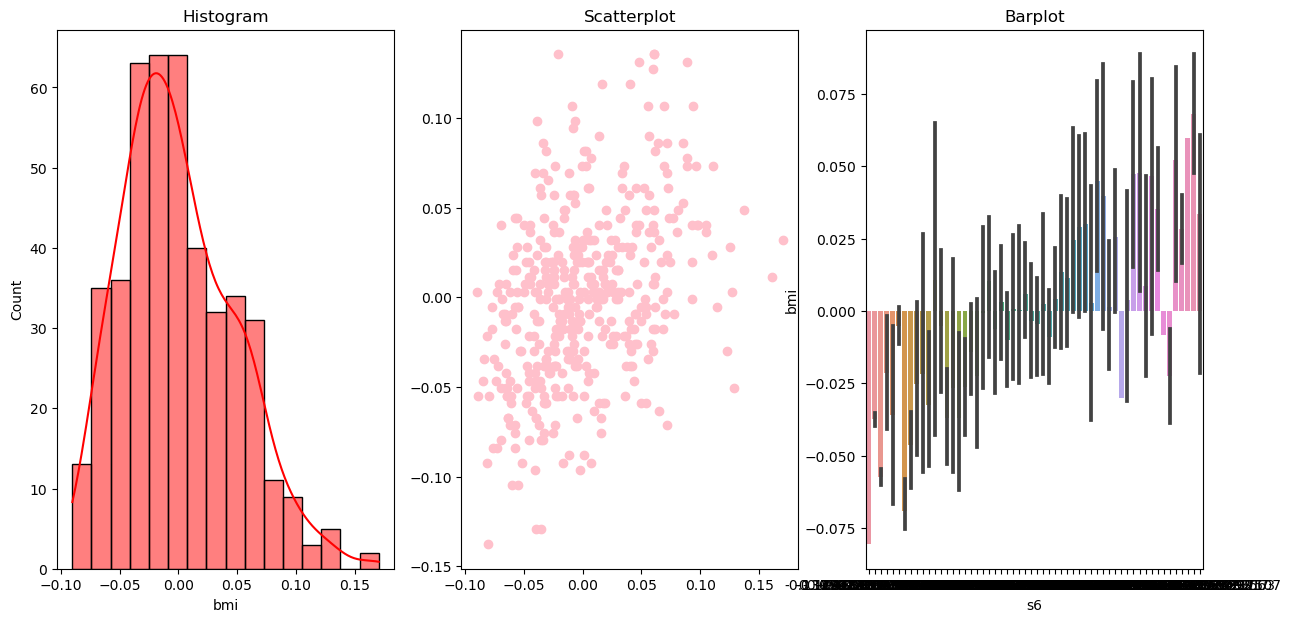

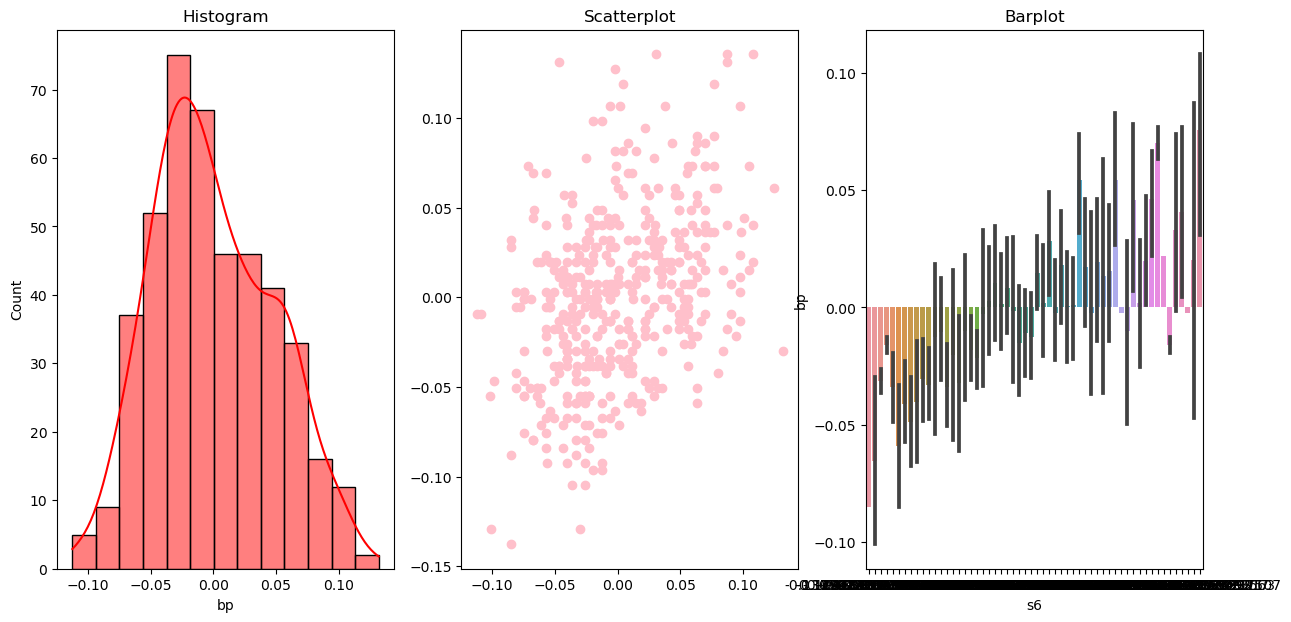

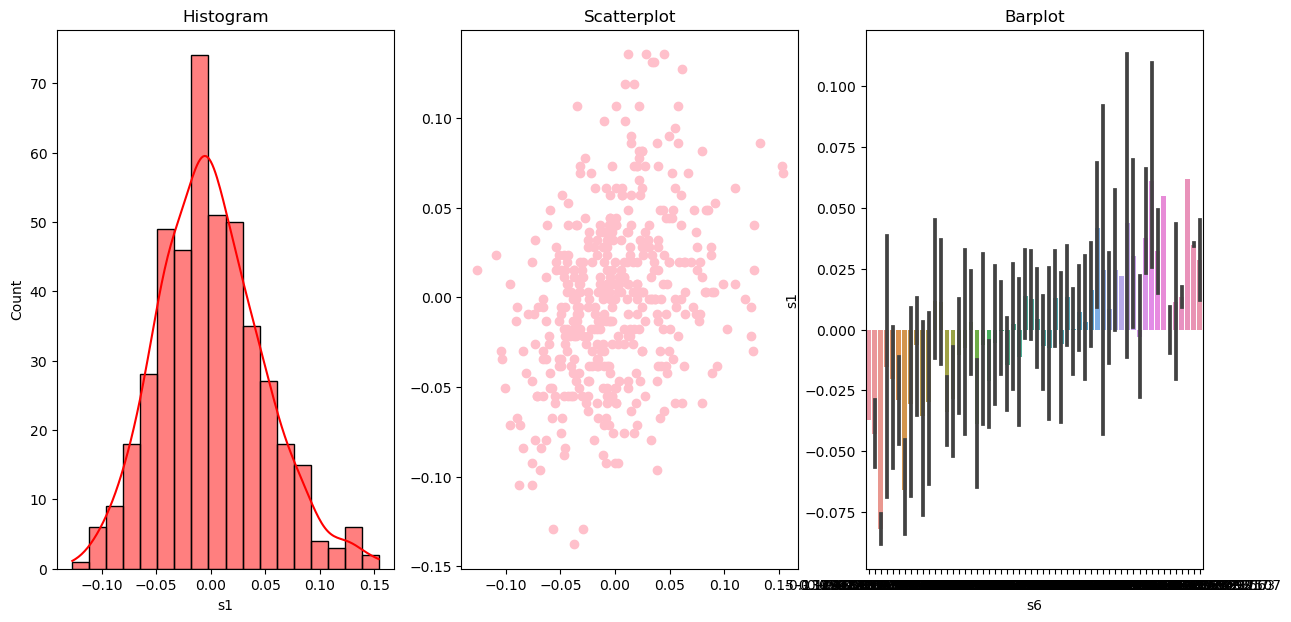

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


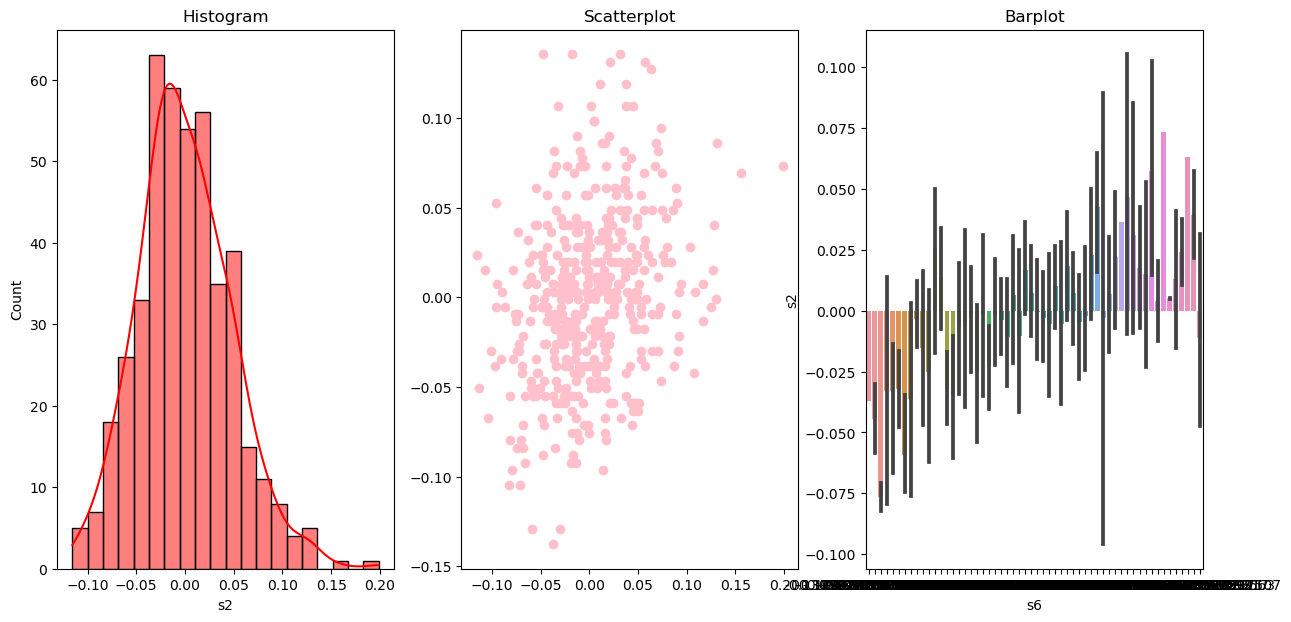

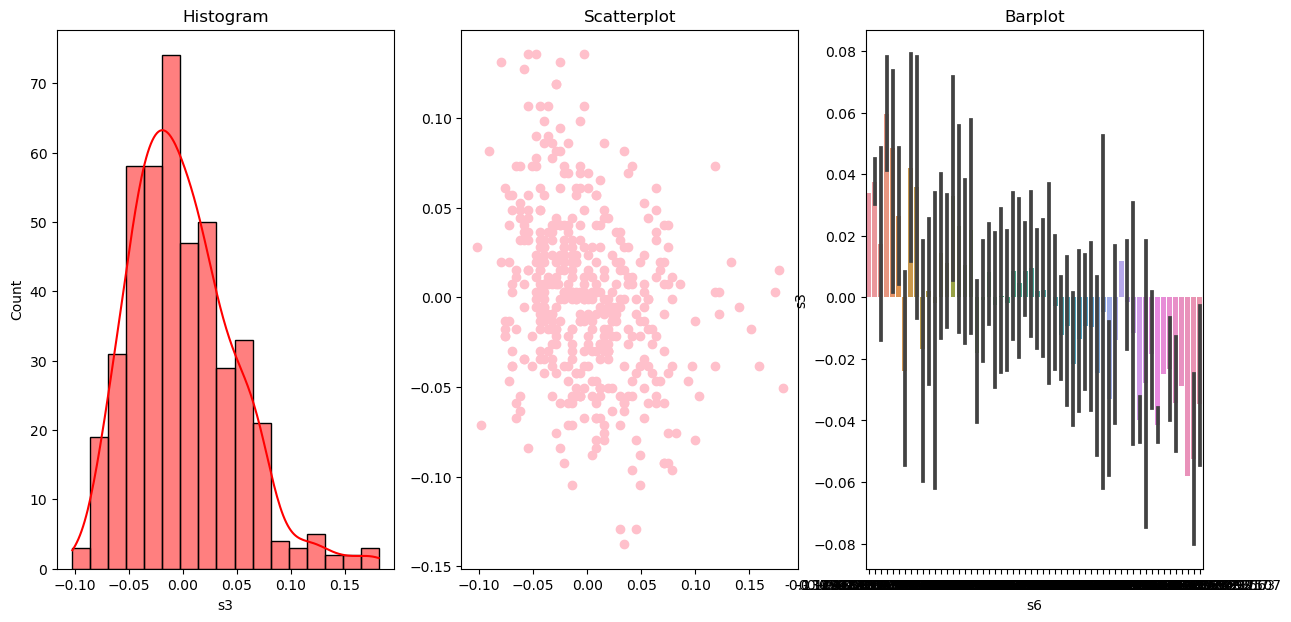

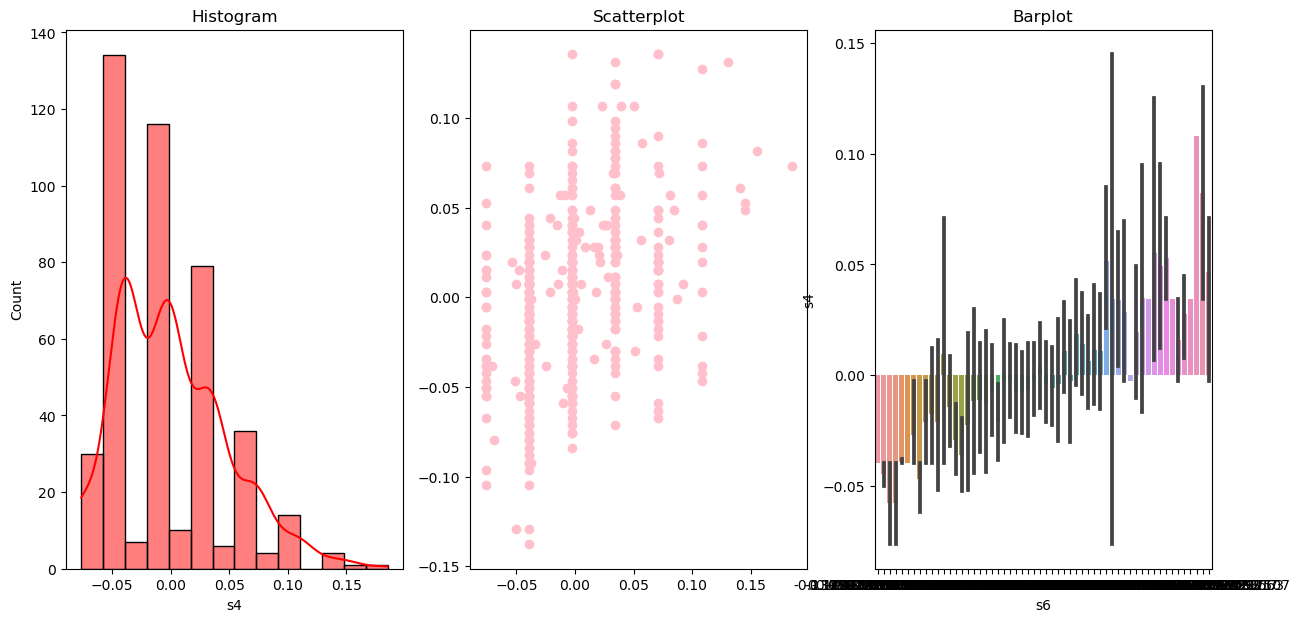

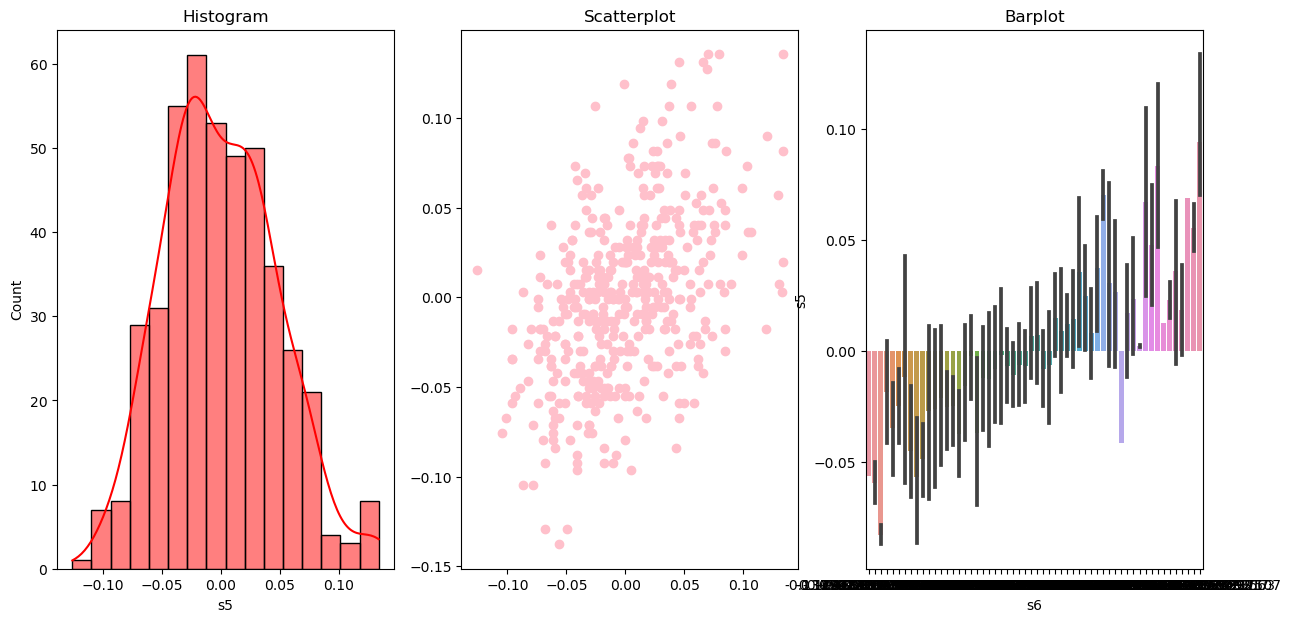

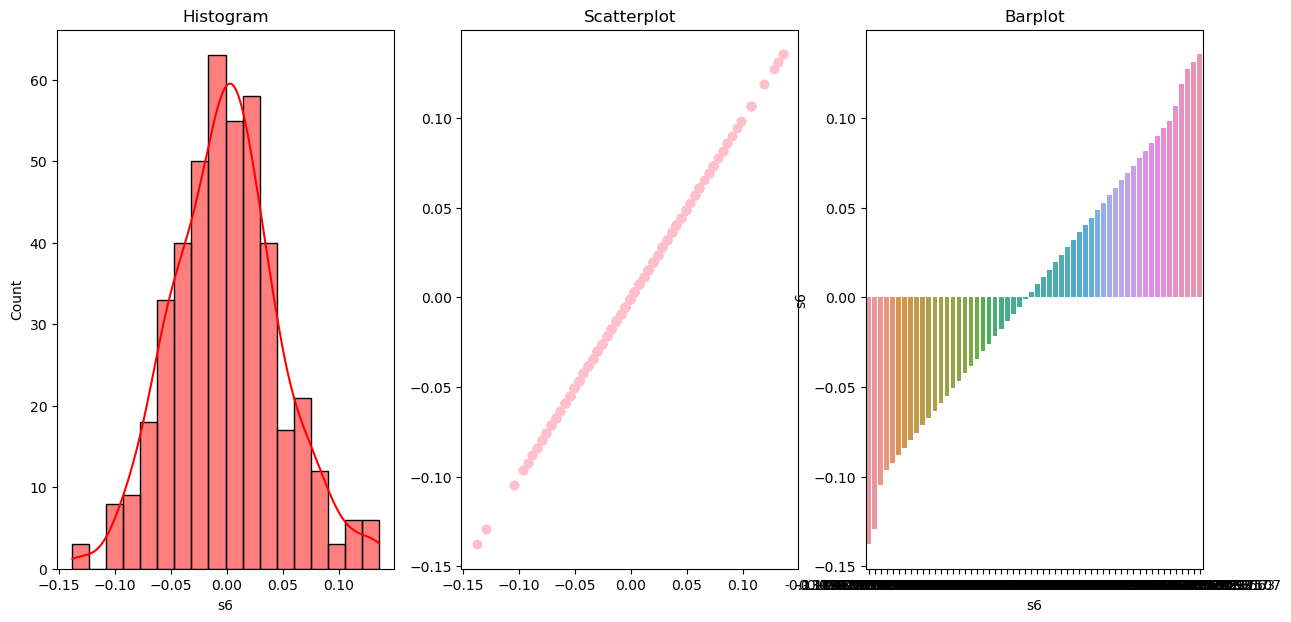

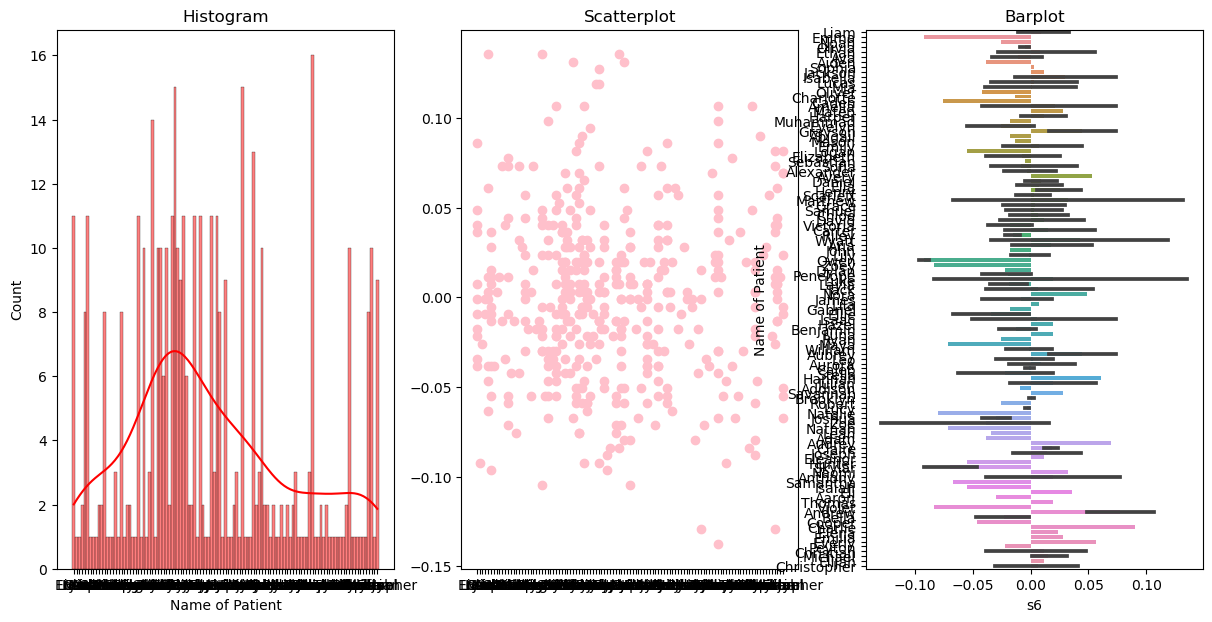

c:\ProgramData\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


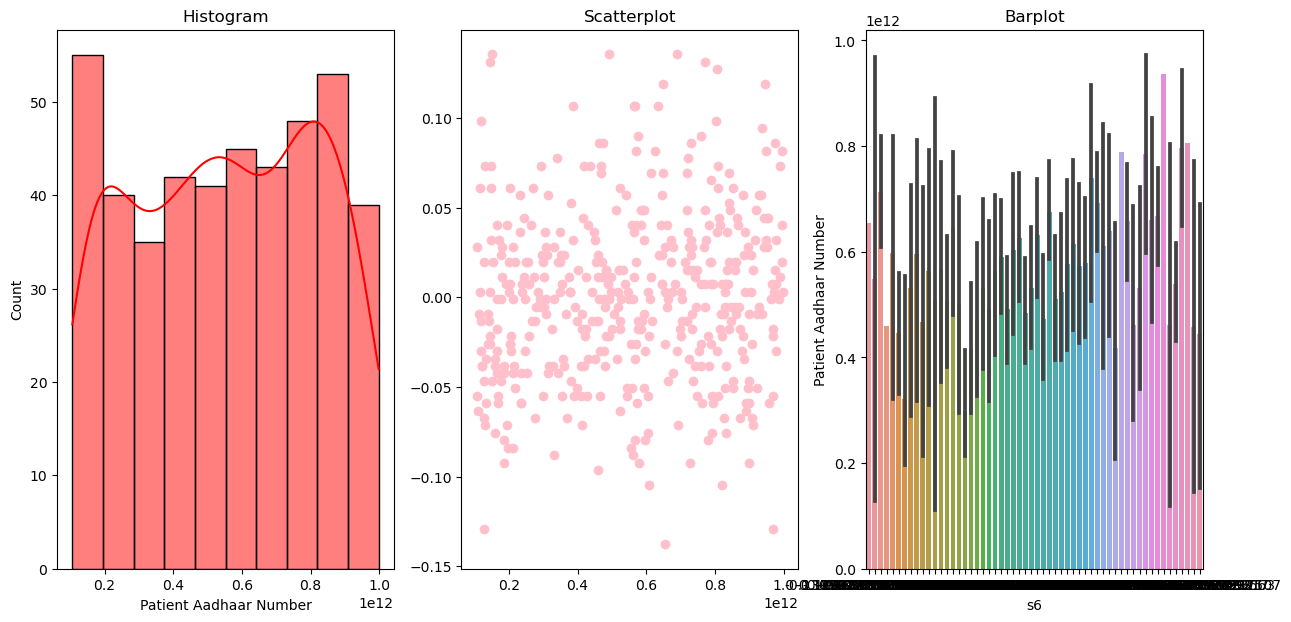

In [11]:
for col in df:
    figure_plot(df, col, 's6')

In [12]:
df['target'] = data_dict['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Name of Patient,Patient Aadhaar Number,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,Liam,5.765504e+11,151.0
1,-0.001882,NaN,-0.051474,-0.026328,-0.008449,NaN,0.074412,-0.039493,-0.068332,-0.092204,Emma,7.282879e+11,75.0
2,0.085299,0.050680,0.044451,NaN,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,Noah,6.552242e+11,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,Olivia,9.228492e+11,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,Ethan,8.527608e+11,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,Aria,8.211359e+11,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,Joseph,8.109118e+11,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,Penelope,8.574362e+11,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,Benjamin,5.547502e+11,220.0


plt.hist(df[column], bins, log=Boolean, align, color, edge)

bins = number of divisions, can be a number to divide equally into that many bins, or a custom list

log = takes care of the range of the x and y axes, when the data has outliers

align =left/right does something to the x axis markings

(array([[ 26.,  52.,  59.,  77., 106.,  70.,  46.,   6.,   0.,   0.],
        [  0.,   0., 234.,   0.,   0., 207.,   0.,   0.,   0.,   0.],
        [  8.,  51.,  96., 104.,  73.,  51.,  37.,  15.,   5.,   2.]]),
 array([-0.10722563, -0.07944755, -0.05166946, -0.02389137,  0.00388671,
         0.0316648 ,  0.05944288,  0.08722097,  0.11499905,  0.14277714,
         0.17055523]),
 <a list of 3 BarContainer objects>)

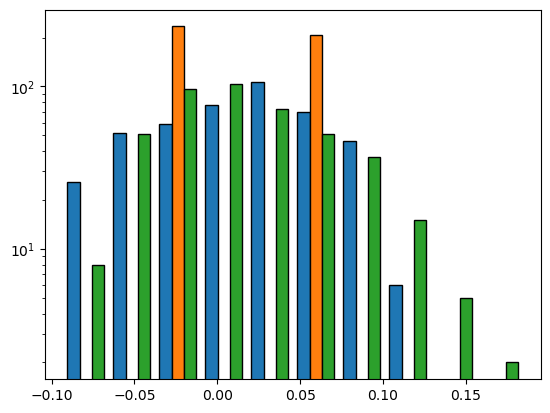

In [13]:
plt.hist(df[['age', 'sex', 'bmi']], bins=10, log=True, align='right', edgecolor = 'black')

### Bar plots

<BarContainer object of 442 artists>

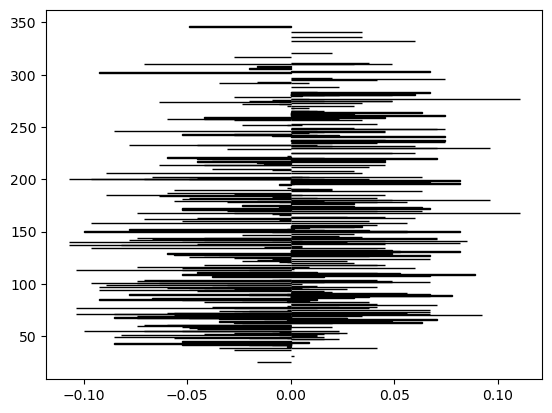

In [14]:
plt.barh(df['target'], df['age'], edgecolor='black', height=0.3)

In [15]:
l = [
    [1,2,3,4,5],
    ['a', 'b', 'c', 'd', 'e'],
    [11,12,13,14,15, 16,17],
    ['allow']
    ]

pd.DataFrame(l)

,0,1,2,3,4,5,6
0,1,2,3,4,5,NaN,NaN
1,a,b,c,d,e,NaN,NaN
2,11,12,13,14,15,16.0,17.0
3,allow,None,None,None,None,NaN,NaN
